
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Linear Regression in Python for Engineers, Data Scientists and Geoscientists 
### Michael Pyrcz, Associate Professor, University of Texas at Austin 

#### Contacts: [Twitter/@GeostatsGuy](https://twitter.com/geostatsguy) | [GitHub/GeostatsGuy](https://github.com/GeostatsGuy) | [www.michaelpyrcz.com](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446)

This is a tutorial / demonstration of **Linear Regression**.  In $Python$, the $SciPy$ package, specifically the $Stats$ functions (https://docs.scipy.org/doc/scipy/reference/stats.html) provide excellent tools for efficient use of statistics.  
I have previously provided this example in R and posted it on GitHub:

1. R https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.R
2. Rmd with docs https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.Rmd 
3. knit as an HTML document(https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.html) 

In all cases, I use the same dataset available as a comma delimited file (https://git.io/fxMql).    

This tutorial includes basic, calculation of a linear regression model (only 1 predictor and 1 response), testing the significance of the parameters, calculation the parameter confidence intervals and the conditional prediction interval.

##### Caveats

I have not included all the details, specifically the test assumptions in this document.  These are included in the accompanying course notes, Lec09_Bivariate_QQ_Regres.pdf.

#### Project Goal

0. Introduction to Python in Jupyter including setting a working directory, loading data into a Pandas DataFrame.
1. Learn the basics for working with linear regresion in Python.  
2. Demonstrate the efficiency of using Python and SciPy package for statistical analysis.

#### Load the required libraries

The following code loads the required libraries.


In [33]:
import os                                                   # to set current working directory 
import numpy as np                                          # arrays and matrix math
import scipy.stats as st                                    # statistical methods
import pandas as pd                                         # DataFrames
import matplotlib.pyplot as plt                             # for plotting
import math                                                 # for square root

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this working directory.  

In [34]:
#os.chdir("C:\PGE337")                                  # set the working directory

#### Loading Data

Let's load the provided dataset. 'Density_Por_data.csv' is available at https://github.com/GeostatsGuy/GeoDataSets. It is a comma delimited file with 20 porosity measures from 2 rock units from the subsurface, porosity (as a fraction). We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it by printing a slice and by utilizing the 'head' DataFrame member function (with a nice and clean format, see below).


In [35]:
#df = pd.read_csv("Density_Por_data.csv")                    # read a .csv file in as a DataFrame
df = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/Density_Por_data.csv") # load data from Dr. Pyrcz's GitHub repository
df.head()                                                   # we could also use this command for a table preview 

,Density,Porosity
0,1.281391,16.610982
1,1.404932,13.668073
2,2.346926,9.590092
3,1.348847,15.877907
4,2.331653,4.968240


It is useful to review the summary statistics of our loaded DataFrame.  That can be accomplished with the 'describe' DataFrame member function.  We transpose to switch the axes for ease of visualization.

In [36]:
df.describe().transpose()   

,count,mean,std,min,25%,50%,75%,max
Density,105.0,1.737917,0.288278,0.996736,1.552713,1.748788,1.906634,2.410560
Porosity,105.0,12.531279,3.132269,4.966421,10.546483,12.411608,14.230930,20.964941


Here we extract the X1 and X2 unit porosity samples from the DataFrame into separate arrays called 'X1' and 'X2' for convenience.

In [37]:
por = df['Porosity']
den = df['Density']
denv = np.linspace(1.0,2.4,100)

#### Linear Regression Model

Let's first calculate the linear regression model



The model parameters are, slope (b1) = -9.1, and the intercept (b0) = 28.35


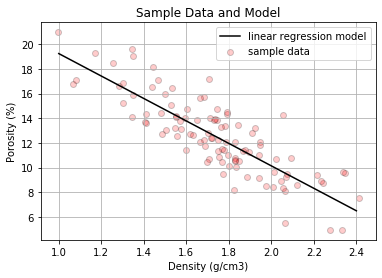

In [38]:
linear = st.linregress(den,por)

print('The model parameters are, slope (b1) = ' + str(round(linear.slope,2)) + ', and the intercept (b0) = ' + str(round(linear.intercept,2)))
plt.scatter(den, por, color = 'red',edgecolor='black',alpha=0.2,label='sample data')
plt.plot(denv, linear.intercept + linear.slope*denv, 'black', label='linear regression model')
plt.title('Sample Data and Model'); plt.xlabel('Density (g/cm3)'); plt.ylabel('Porosity (%)')
plt.legend(); plt.grid()
plt.show()

#### Model Confidence Intervals

Let's calculate the 95% confidence interval for the linear regression model slope parameter, $b_1$, of our model.

* we first need the $t_{critical}$ value, given $alpha = 0.05$ and $df = n-2$.

In [39]:
alpha = 0.05
tstat = st.t.ppf([alpha/2,1-alpha/2], len(por)-2)
slope_lower,slope_upper = linear.slope + tstat*linear.stderr
#intercept_lower,intercept_upper = linear.intercept + tstat*linear.intercept_stderr

print('The model parameters confidence intervals at a ' + str(1-alpha) + ' significance level are:')
print('Slope: ' + str(round(slope_lower,2)) + ' , ' + str(round(slope_upper,2)))
#print('Intercept: ' + str(round(intercept_lower,2)) + ' , ' + str(round(intercept_upper,2)))

The model parameters confidence intervals at a 0.95 significance level are:
Slope: -10.26 , -7.94


#### Model Prediction Intervals

Let's calculate the prediction intervals.

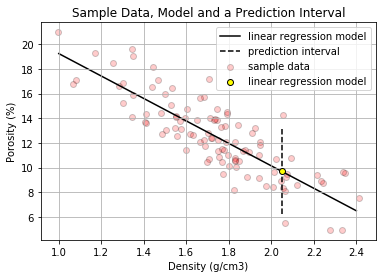

In [40]:
new_x = 2.05
apha = 0.05

por_hat = linear.intercept + linear.slope*den
MSE = np.sum(np.power(por-por_hat,2))/(len(por)-2)
est_stderr = math.sqrt(1 + 1/len(por) + np.power(new_x - np.average(den),2)/np.sum(np.power(den-np.average(den),2)))
tstat = st.t.ppf([alpha/2,1-alpha/2], len(por)-2)

y_pred_lower, y_pred_upper = linear.intercept + linear.slope*new_x + tstat*math.sqrt(MSE)*est_stderr

plt.scatter(den, por, color = 'red',edgecolor='black',alpha=0.2,label='sample data',zorder=1)
plt.plot(denv, linear.intercept + linear.slope*denv, 'black', label='linear regression model',zorder=1)
plt.scatter(new_x, linear.intercept + linear.slope*new_x, color='yellow',edgecolor='black',label='linear regression model',zorder=2)
plt.plot([new_x,new_x],[y_pred_lower,y_pred_upper],color='black',linestyle='dashed',zorder=1,label='prediction interval')
plt.title('Sample Data, Model and a Prediction Interval'); plt.xlabel('Density (g/cm3)'); plt.ylabel('Porosity (%)')
plt.legend(); plt.grid()
plt.show()


#### Model Checking

Let's test the slope with the following hypothesis test:

\begin{equation}
H_0: b_{1} = 0.0
\end{equation}

\begin{equation}
H_1: b_{1} \ne 0.0
\end{equation}

and see if we can reject this hypothesis, $H_{0}$ , that the slope parameter is equal to 0.0.  If we reject this null hypothesis, we show that the slope is meaning full and there is a linear relationship between density and porosity that we can use.

Fortunately, the $linregress$ function from the $stats$ package provides us with the two sided p-value for this test.  

In [41]:
print('The linear regression model slope parameter p-value is ' + str(round(linear.pvalue,3)) + '.')

The linear regression model slope parameter p-value is 0.0.


We reject the null hypothesis and adopt the alternative hypothesis, $H_1$, that the slope is not equal to 0.0.

#### Correlation Coefficien and $r^2$ Values

We can also observe correlation coefficient, $\rho^2 = r^2$, and the $r^2$ value that indicates the proportion of variance that is described for our model. 

* valid for our linear model

In [42]:
print('The correlation coefficient is = ' + str(round(linear.rvalue,2)) + ' and the r-squared value = ', str(round(linear.rvalue**2,2)))

The correlation coefficient is = -0.84 and the r-squared value =  0.7


#### Model Cross Validation

Let's use this model to make a prediction at all the data locations.  

* now plot a standard model cross validation plot, actual vs. predicted values for the response feature
* note, we are only looking at data used to build the model, known as training data.

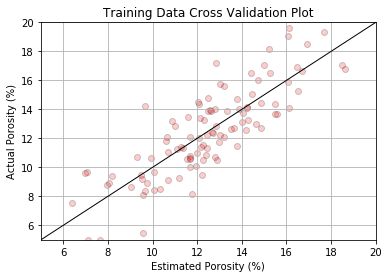

In [43]:
por_hat = linear.slope * den + linear.intercept
plt.scatter(por_hat,por,color='red',alpha=0.2,edgecolor='black')
plt.plot([0,30],[0,30],color='black',linewidth=1)
plt.ylabel('Actual Porosity (%)'); plt.xlabel('Estimated Porosity (%)'); plt.title('Training Data Cross Validation Plot')
plt.xlim(5,20); plt.ylim(5,20)
plt.grid(); plt.show()

Now let's look at the distribution of estimates.

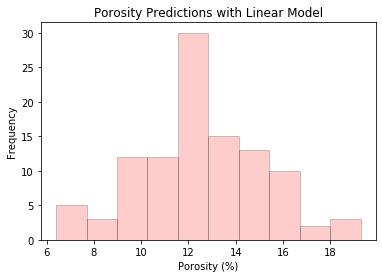

In [44]:
plt.hist(por_hat,color='red',alpha=0.2,edgecolor='black')
plt.title("Porosity Predictions with Linear Model")
plt.xlabel('Porosity (%)'); plt.ylabel('Frequency')
plt.show()

It is useful to plot the predictions of porosity and porosity data vs. the density data. From this plot we can observe the linear limitation of our model and get a sense of the unexplained variance $\frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2} {n-1}$

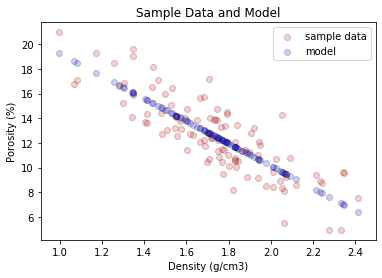

In [45]:
plt.scatter(den, por,color='red',alpha=0.2,edgecolor='black',label='sample data')
plt.scatter(den, por_hat,color='blue',alpha=0.2,edgecolor='black',label='model')
plt.title('Sample Data and Model'); plt.xlabel('Density (g/cm3)'); plt.ylabel('Porosity (%)')
plt.legend()
plt.show()

Next let's calculate the residual and check their distribution. 

* residuals are the true values at the data locations minus the estimates at the data locations, $y_i - \hat{y}_i$.  

We want to make sure the average is close to 0.0 (unbiased estimates) and to observe the shape and spread of the residual distribution.

The average of the residuals is -0.0


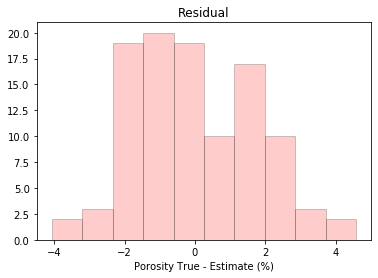

In [46]:
residual = por - por_hat
plt.hist(residual,color='red',alpha=0.2,edgecolor='black')
plt.title("Residual")
plt.xlabel('Porosity True - Estimate (%)')
print('The average of the residuals is ' + str(round(np.mean(residual),2)))

Next we will check the residual vs. the fitted value.  

* we want to see if the errors are consistent over the range of fitted values.  

* for example, we could use this plot to identify higher error or systematic under- or overestimation over a specific range of fitted values.

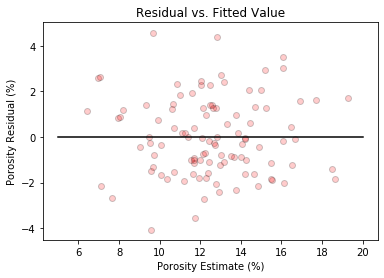

In [47]:
plt.scatter(por_hat,residual,color='red',alpha=0.2,edgecolor='black')
plt.title('Residual vs. Fitted Value')
plt.xlabel('Porosity Estimate (%)')
plt.ylabel('Porosity Residual (%)')
plt.plot([5,20], [0,0],'black')
plt.show()

#### Comments

This was a basic demonstration of linear regression in Python with the SciPy package.

I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
